## Introduction

This notebook contains:  
1. Bar charts.
2. Adding labels to bar charts.
3. Relative charts.
4. Stacked charts
5. Dodged charts with groups

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from palmerpenguins import load_penguins

In [8]:
data = load_penguins()

In [9]:
#drop NA
data.dropna(inplace = True)

### 1. Simple Bar Chart

In [12]:
#count total number of each species
species_count = data.species.value_counts()
species_count

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [18]:
#access name of categories
print("species_count.index: {0}".format(species_count.index))
#access total count of each
print("species_count.values: {0}".format(species_count.values))

species_count.index: Index(['Adelie', 'Gentoo', 'Chinstrap'], dtype='object', name='species')
species_count.values: [146 119  68]


In [25]:
#to get count of specific category
#find count of Adelie penguins
species_count.get('Adelie',[0])

np.int64(146)

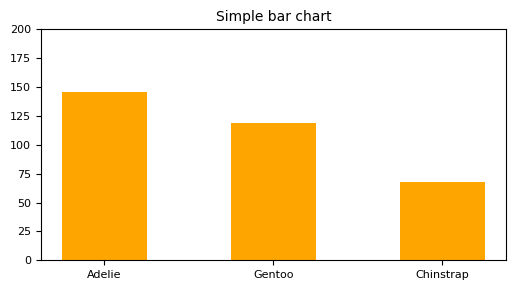

In [37]:
#simple bar chart
fig, ax = plt.subplots(1,1, figsize = (6,3))
plt.bar(species_count.index, species_count.values, color='orange', width = 0.5)
plt.ylim(0,200)
plt.title('Simple bar chart', fontsize = 10)
plt.tick_params(axis='both', labelsize=8)
plt.show()

### 2. Stacked Bar Chart

In [38]:
#total count of penguins by species and gender
grouped_counts = data.groupby(['species', 'sex']).size().unstack()
grouped_counts

sex,female,male
species,,
Adelie,73,73
Chinstrap,34,34
Gentoo,58,61


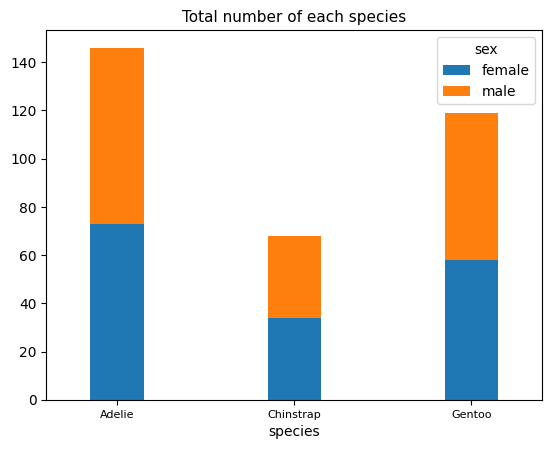

In [50]:
#simple bar chart
grouped_counts.plot(kind = 'bar', stacked = True, width=0.3)
plt.title('Total number of each species', fontsize = 11)
#prevent the X-labels from being at 90 degrees; make them horizontal.
plt.xticks(rotation=0, fontsize=8)
plt.show()

### 3. Dodged bar chart

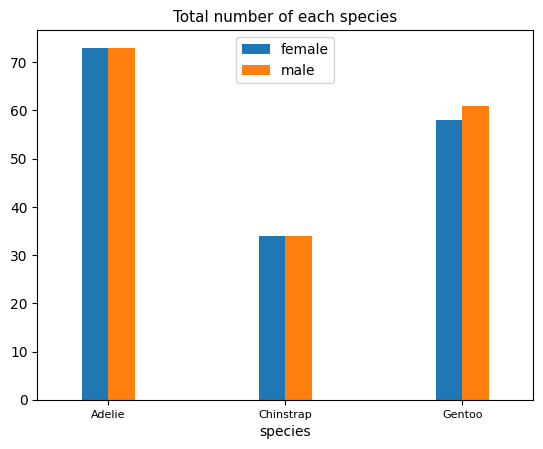

In [53]:
#dodged bar chart
grouped_counts.plot(kind = 'bar', stacked = False, width=0.3)
plt.title('Total number of each species', fontsize = 11)
#prevent the X-labels from being at 90 degrees; make them horizontal.
plt.xticks(rotation=0, fontsize=8)
plt.legend(loc = 'upper center')
plt.show()

### 4. Change color of the bars

In [61]:
#create colormap
gender_colors = ListedColormap(['yellow', 'green'])
#create numerical representation of the genders
gender_mapping = {'male':0, 'female':1}
#create a column in dataset with 1s and 0s for male/female
data['sex_map'] = data['sex'].map(gender_mapping)

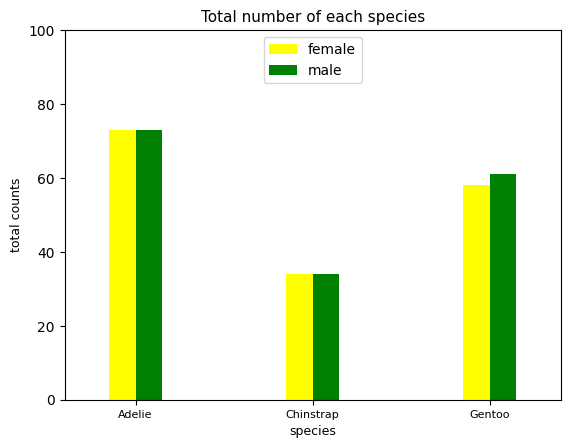

In [66]:
# dodged bar chart with custom colors
grouped_counts.plot(kind = 'bar', stacked = False, width=0.3, color=gender_colors.colors)
plt.title('Total number of each species', fontsize = 11)
#prevent the X-labels from being at 90 degrees; make them horizontal.
plt.xticks(rotation=0, fontsize=8)
plt.ylim(0, 100)
plt.ylabel('total counts', fontsize = 9)
plt.xlabel('species', fontsize = 9)
plt.legend(loc = 'upper center')
plt.show()

### 5. Add text labels above the bars

#### 5a. Add text labels above simple bars

#### 5b. Add text labels above dodged bars

#### 5c. Add text labels inside stacked bars